In [212]:
import openai as ai
import os
import json as j
import requests as r
import sys as s
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [85]:

# URL of the website to scrape
url = 'https://strengthlevel.com/strength-standards'

# Send a GET request to the URL
response = r.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

soup
# Show all the names of the classes
# for i in soup.find_all('td', class_='text-left'):
#     print(i.text)

# Show all the names of the classes


<!DOCTYPE html>

<html lang="en">
<head>
<title>Weightlifting Strength Standards - Strength Level</title>
<meta content="Strength standard tables of one-rep max performance against bodyweight. Available for gym exercises including bench press, squat and deadlift." name="description"/>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="https://static.strengthlevel.com/" rel="dns-prefetch"/>
<link href="https://www.googletagmanager.com/" rel="dns-prefetch"/>
<link href="https://cdn.fuseplatform.net/" rel="dns-prefetch"/>
<link href="https://cmp.inmobi.com/" rel="dns-prefetch"/>
<link href="https://securepubads.g.doubleclick.net/" rel="dns-prefetch"/>
<link href="https://pagead2.googlesyndication.com/" rel="dns-prefetch"/>
<link as="image" href="/images/logo-white-bold-opt.svg" rel="preload"/>
<link as="font" crossorigin="" href="/css/strengthlevelfontcore.woff2?53993404d10b593d0897284053a81782" rel="preload"/>
<style>@font-face{font-

**Get all exercises**

In [86]:

title = soup.title
print(title)
text = soup.get_text()
# print(text) 

# Find class "content" in the HTML
content = soup.find_all(class_="content")
"""
for i, c in enumerate(content):
    print(f"{i}: {c}")
"""
content1 = content[1]
exercises = []
# Find all headers 
for ul in content1.find_all('ul'):
    for li in ul.find_all('li'):
        exercises.append(li.text)
print(exercises)

<title>Weightlifting Strength Standards - Strength Level</title>
['Bench Press', 'Squat', 'Deadlift', 'Shoulder Press', 'Barbell Curl', 'Bent Over Row', 'Incline Bench Press', 'Front Squat', 'Hex Bar Deadlift', 'Power Clean', 'Hip Thrust', 'Romanian Deadlift', 'Military Press', 'Sumo Deadlift', 'Clean and Jerk', 'Snatch', 'Close Grip Bench Press', 'EZ Bar Curl', 'Seated Shoulder Press', 'Clean', 'Lying Tricep Extension', 'Barbell Shrug', 'Push Press', 'Decline Bench Press', 'T Bar Row', 'Preacher Curl', 'Clean and Press', 'Smith Machine Bench Press', 'Rack Pull', 'Pendlay Row', 'Box Squat', 'Dumbbell Bench Press', 'Dumbbell Curl', 'Dumbbell Shoulder Press', 'Incline Dumbbell Bench Press', 'Dumbbell Lateral Raise', 'Dumbbell Row', 'Hammer Curl', 'Dumbbell Bulgarian Split Squat', 'Seated Dumbbell Shoulder Press', 'Goblet Squat', 'Dumbbell Fly', 'Dumbbell Shrug', 'Dumbbell Lunge', 'Dumbbell Tricep Extension', 'Pull Ups', 'Push Ups', 'Dips', 'Chin Ups', 'Sled Leg Press', 'Leg Extension', '

**Get maxes for each exercise**

In [87]:
# Replace each " " with "-" in the exercises
for i in range(len(exercises)):
    exercises[i] = exercises[i].replace(" ", "-")
print(exercises[0])

Bench-Press


In [95]:
base_url = "https://strengthlevel.com/strength-standards/"
for exercise in exercises:
    response = r.get(base_url + exercise)
    soup = BeautifulSoup(response.text, 'html.parser')


KeyboardInterrupt: 

In [103]:
response = r.get(base_url + exercises[0])
soup_bench = BeautifulSoup(response.text, 'html.parser')



**Get headers**

In [104]:
headers = soup_bench.find_all(['h1', 'h2', 'h3', 'h4', 'h5', 'h6'])
for header in headers:
    print(header.text)

Bench Press Standards
Measured in lb

                      Bench Press strength standards help you to compare your one-rep max lift with
              other lifters at your bodyweight.                  
Male

    Male Bench Press Standards (lb)
  
Entire Community
Weight
Bodyweight Ratio
How much should I be able to Bench Press? (lb)
By Weight and Age
By Bodyweight
By Age
How many sets and reps of Bench Press should I do?
Calculate Your Strength Level
Female

    Female Bench Press Standards (lb)
  
Entire Community
Weight
Bodyweight Ratio
How much should I be able to Bench Press? (lb)
By Weight and Age
By Bodyweight
By Age
How many sets and reps of Bench Press should I do?
Calculate Your Strength Level

      Create Standards    

        Recommended Program
      
Rate Your Lifts Against Other People
What do the strength standards mean?
More Exercises
Other Languages
Footer

          Follow        

          About Us        

          Contact        


In [179]:
body = soup_bench.find_all('tbody')
weight = body[0].text

strength = []
weight = []
# Get the table headers
table_headers = body[0].find_all("tr")
for th in table_headers:
    strength.append(th.find_all('td')[0].text)
    weight.append(int(th.find_all('td')[1].text.replace(" lb", "")))

    
print(strength)
print(weight)

['Beginner', 'Novice', 'Intermediate', 'Advanced', 'Elite']
[103, 154, 217, 291, 372]


In [194]:
table_data = body[1].find_all('tr')
ratio = []
for table in table_data:
    ratio.append(float(table.find_all('td')[1].text.replace("x", "")))
ratio

[0.5, 0.75, 1.25, 1.75, 2.0]

In [216]:
data = body[2].find_all('tr')
bodyweight = []
beginner = []
novice = []
intermediate = []
advanced = []
elite = []
for d in data:
    bodyweight.append(int(d.find_all('td')[0].text))
    beginner.append(int(d.find_all('td')[1].text))
    novice.append(int(d.find_all('td')[2].text))
    intermediate.append(int(d.find_all('td')[3].text))
    advanced.append(int(d.find_all('td')[4].text))
    elite.append(int(d.find_all('td')[5].text))

data = {
    "Bodyweight": bodyweight,
    "Beginner": beginner,
    "Novice": novice,
    "Intermediate": intermediate,
    "Advanced": advanced,
    "Elite": elite
}
bench_data = pd.DataFrame(data)

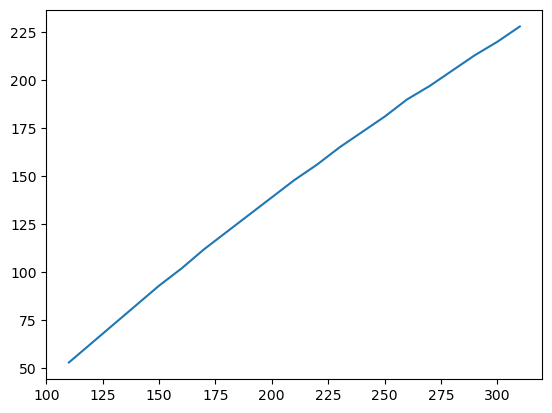

In [230]:
plt.plot(bodyweight, beginner)

In [235]:
arr = [ [weight, beg, nov, inter, adv, el] for weight, beg, nov, inter, adv, el in zip(bodyweight, beginner, novice, intermediate, advanced, elite) ]
arr

[[110, 53, 84, 125, 173, 226],
 [120, 63, 97, 140, 191, 247],
 [130, 73, 109, 154, 208, 266],
 [140, 83, 121, 169, 224, 285],
 [150, 93, 133, 182, 240, 302],
 [160, 102, 144, 196, 255, 319],
 [170, 112, 155, 209, 270, 336],
 [180, 121, 166, 221, 284, 352],
 [190, 130, 177, 234, 298, 367],
 [200, 139, 187, 246, 312, 382],
 [210, 148, 197, 257, 325, 397],
 [220, 156, 207, 269, 338, 411],
 [230, 165, 217, 280, 350, 425],
 [240, 173, 227, 291, 362, 438],
 [250, 181, 236, 301, 374, 451],
 [260, 190, 245, 312, 386, 464],
 [270, 197, 254, 322, 397, 476],
 [280, 205, 263, 332, 408, 488],
 [290, 213, 272, 341, 419, 500],
 [300, 220, 280, 351, 429, 511],
 [310, 228, 289, 360, 439, 523]]